In [6]:
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 23.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 72.7 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [4]:
#ignore warning 
import warnings
warnings.filterwarnings('ignore')

In [7]:
#library import for logistic Regression requirment
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso,LassoCV,ElasticNet,ElasticNetCV,LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
sns.set()

In [8]:
#import dataset
data=pd.read_csv('diabetes.csv')

In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [10]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.90,0.17,63,0
764,2,122,70,27,0,36.80,0.34,27,0
765,5,121,72,23,112,26.20,0.24,30,0
766,1,126,60,0,0,30.10,0.35,47,1
767,1,93,70,31,0,30.40,0.32,23,0


In [11]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [13]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


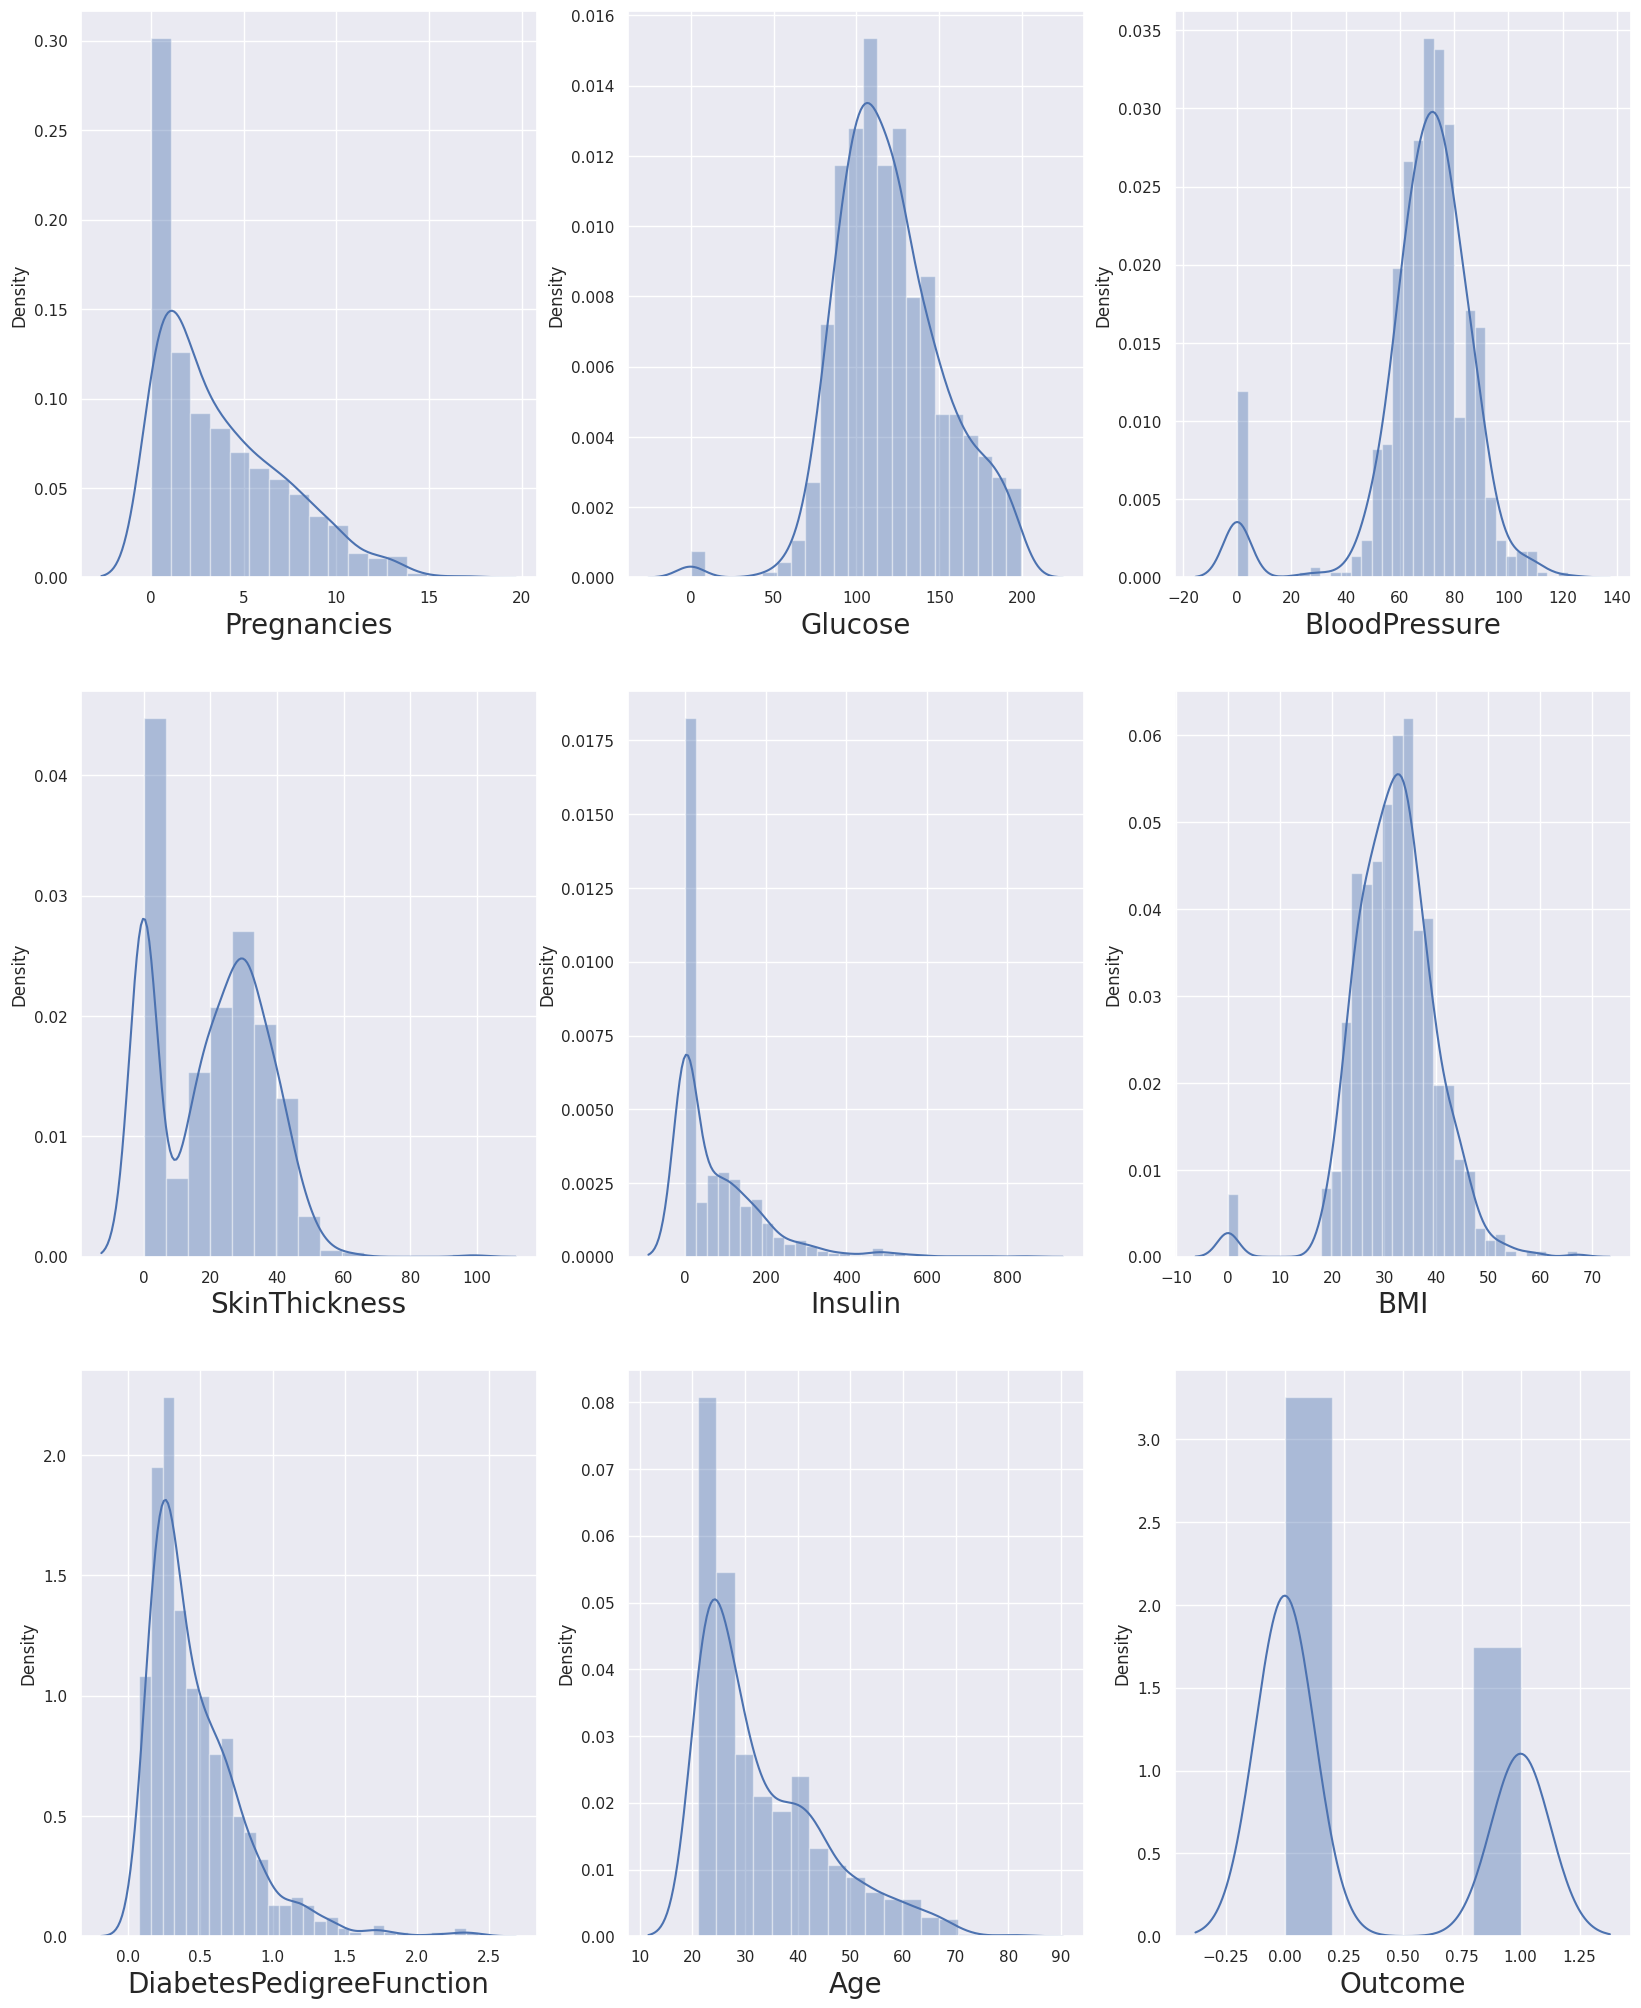

In [15]:
#visulaziation
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for i in data:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

In [16]:
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [17]:
data['BMI']

0     33.60
1     26.60
2     23.30
3     28.10
4     43.10
       ... 
763   32.90
764   36.80
765   26.20
766   30.10
767   30.40
Name: BMI, Length: 768, dtype: float64

In [18]:
data['BloodPressure']

0     72.00
1     66.00
2     64.00
3     66.00
4     40.00
       ... 
763   76.00
764   70.00
765   72.00
766   60.00
767   70.00
Name: BloodPressure, Length: 768, dtype: float64

In [19]:
data['Glucose']

0     148.00
1      85.00
2     183.00
3      89.00
4     137.00
       ...  
763   101.00
764   122.00
765   121.00
766   126.00
767    93.00
Name: Glucose, Length: 768, dtype: float64

In [20]:
data['Insulin']

0      79.80
1      79.80
2      79.80
3      94.00
4     168.00
       ...  
763   180.00
764    79.80
765   112.00
766    79.80
767    79.80
Name: Insulin, Length: 768, dtype: float64

In [21]:
data['SkinThickness']

0     35.00
1     29.00
2     20.54
3     23.00
4     35.00
       ... 
763   48.00
764   27.00
765   23.00
766   20.54
767   31.00
Name: SkinThickness, Length: 768, dtype: float64

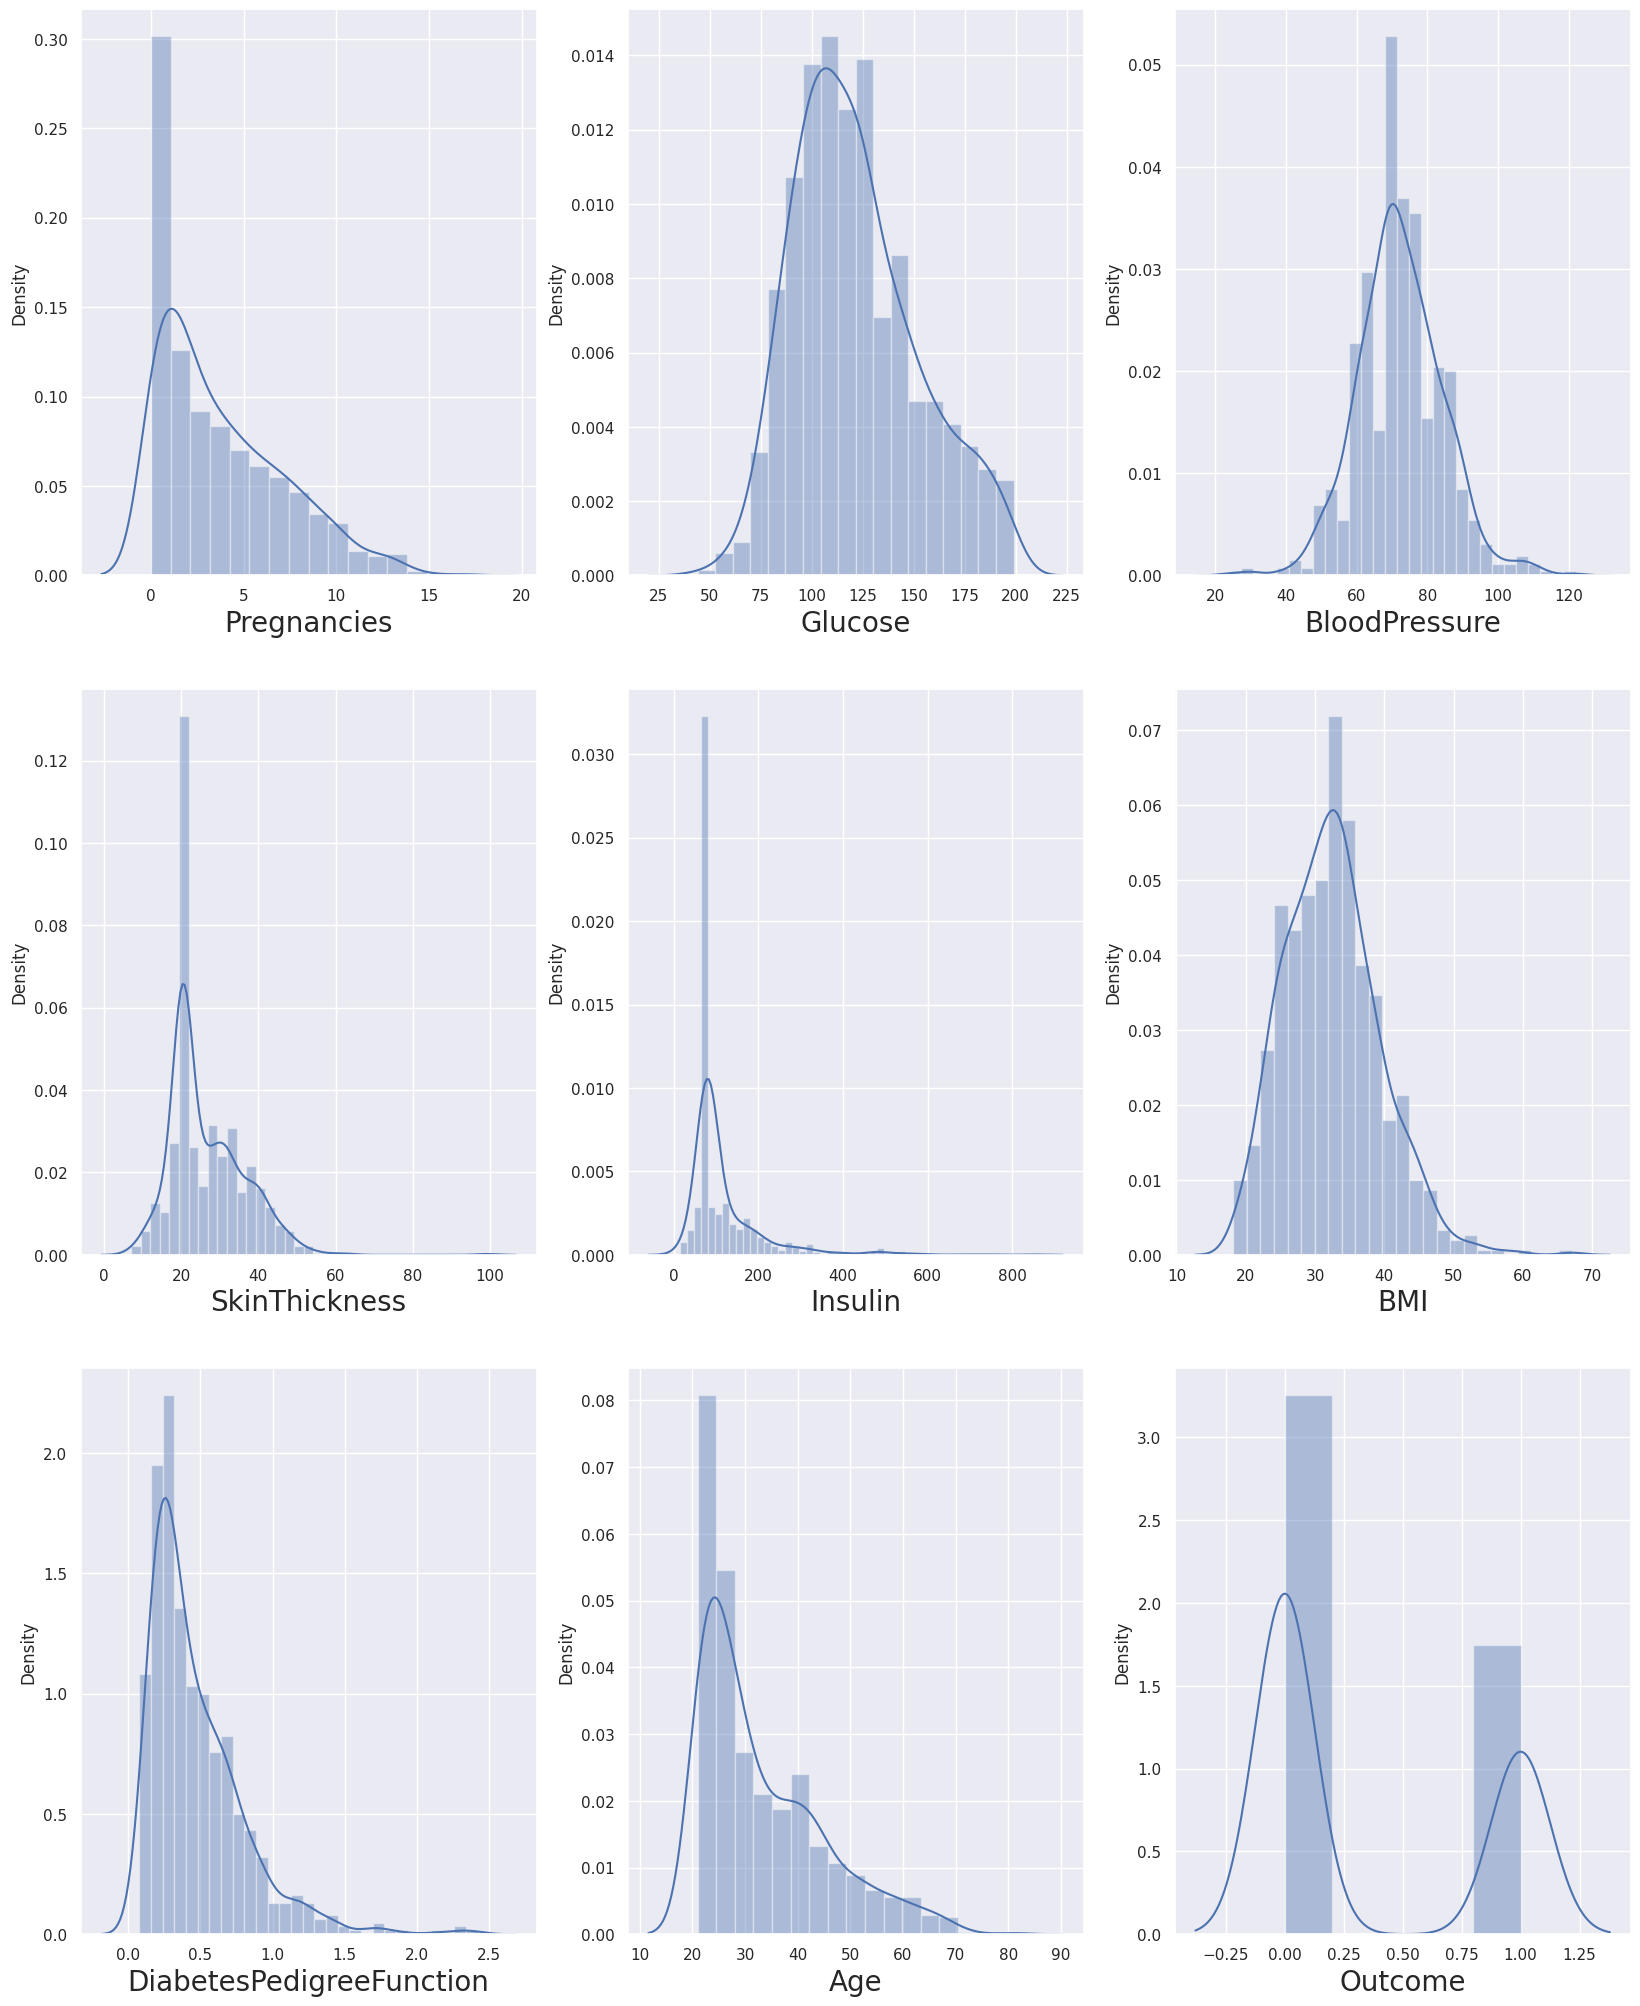

In [22]:
#visulaziation
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for i in data:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot:>

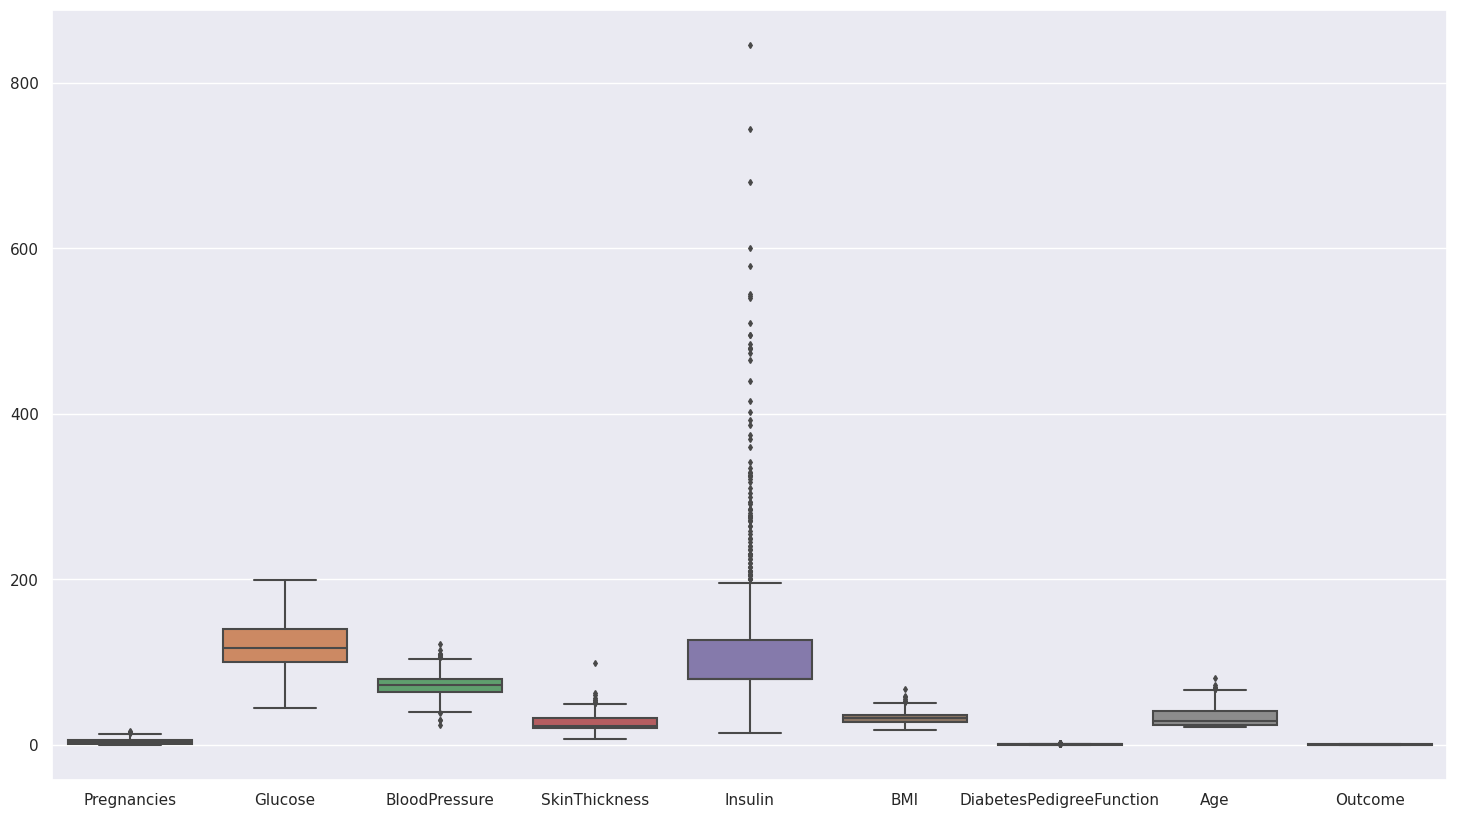

In [23]:
fig,ax=plt.subplots(figsize=(18,10))
sns.boxplot(data=data,ax=ax,fliersize=3)

In [24]:
q = data['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = data[data['Pregnancies']<q]

q = data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]

q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]

q = data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]

q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]

q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

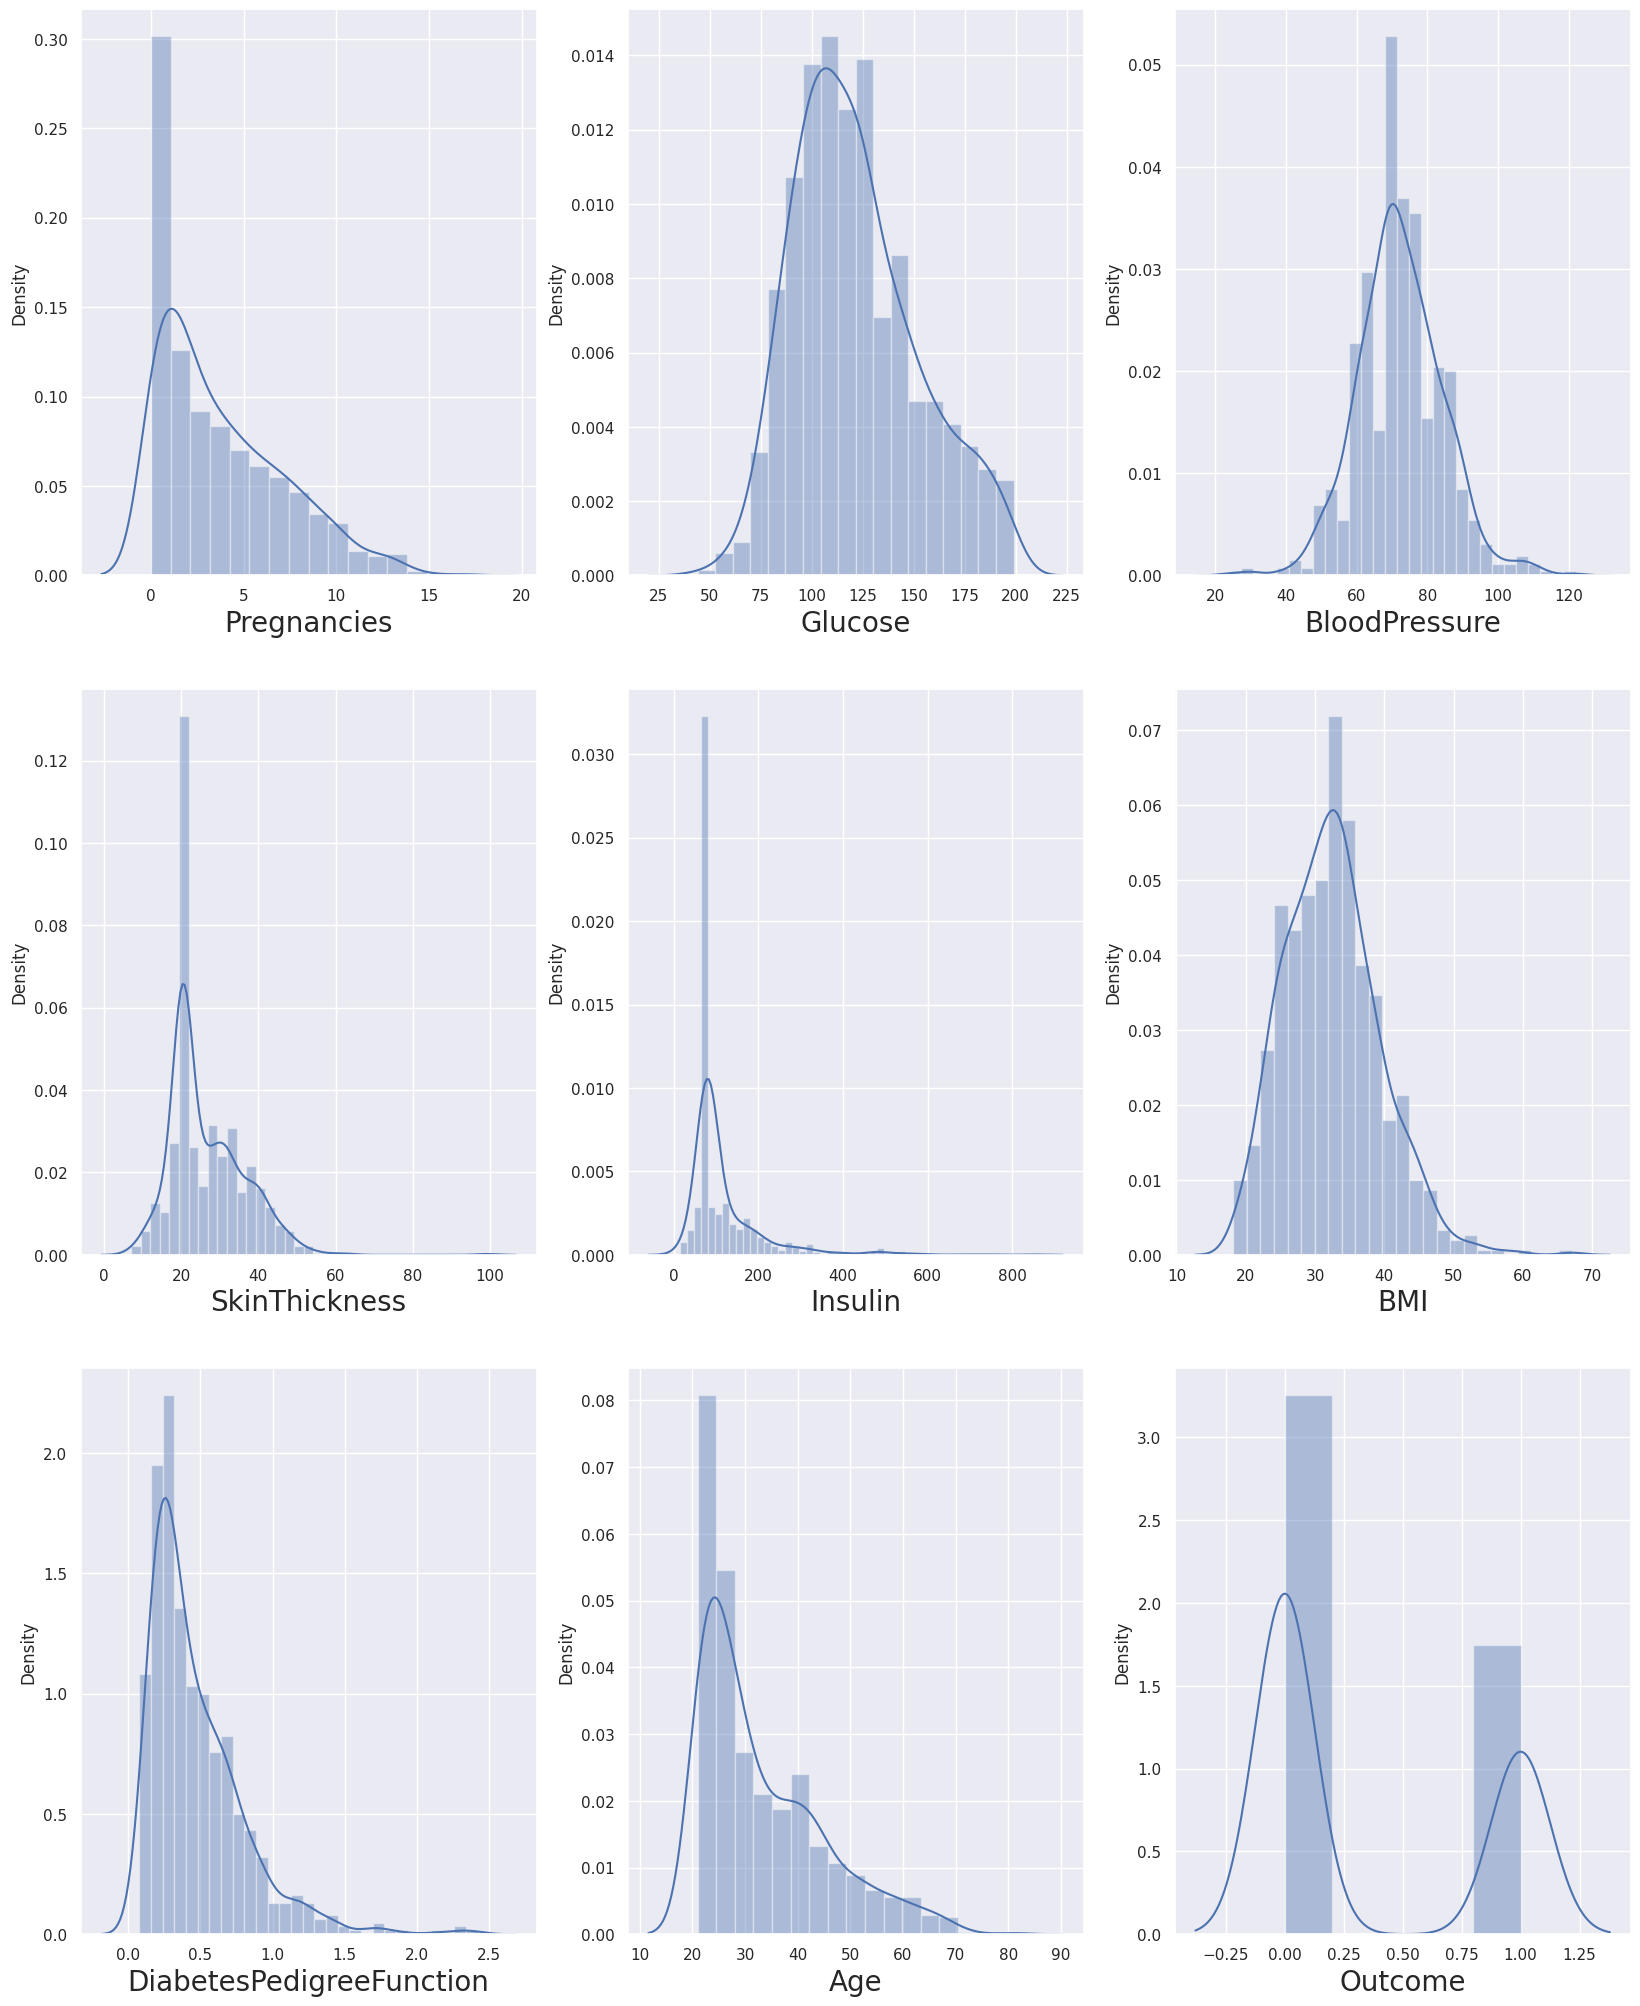

In [25]:
#visulaziation
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for i in data:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot:>

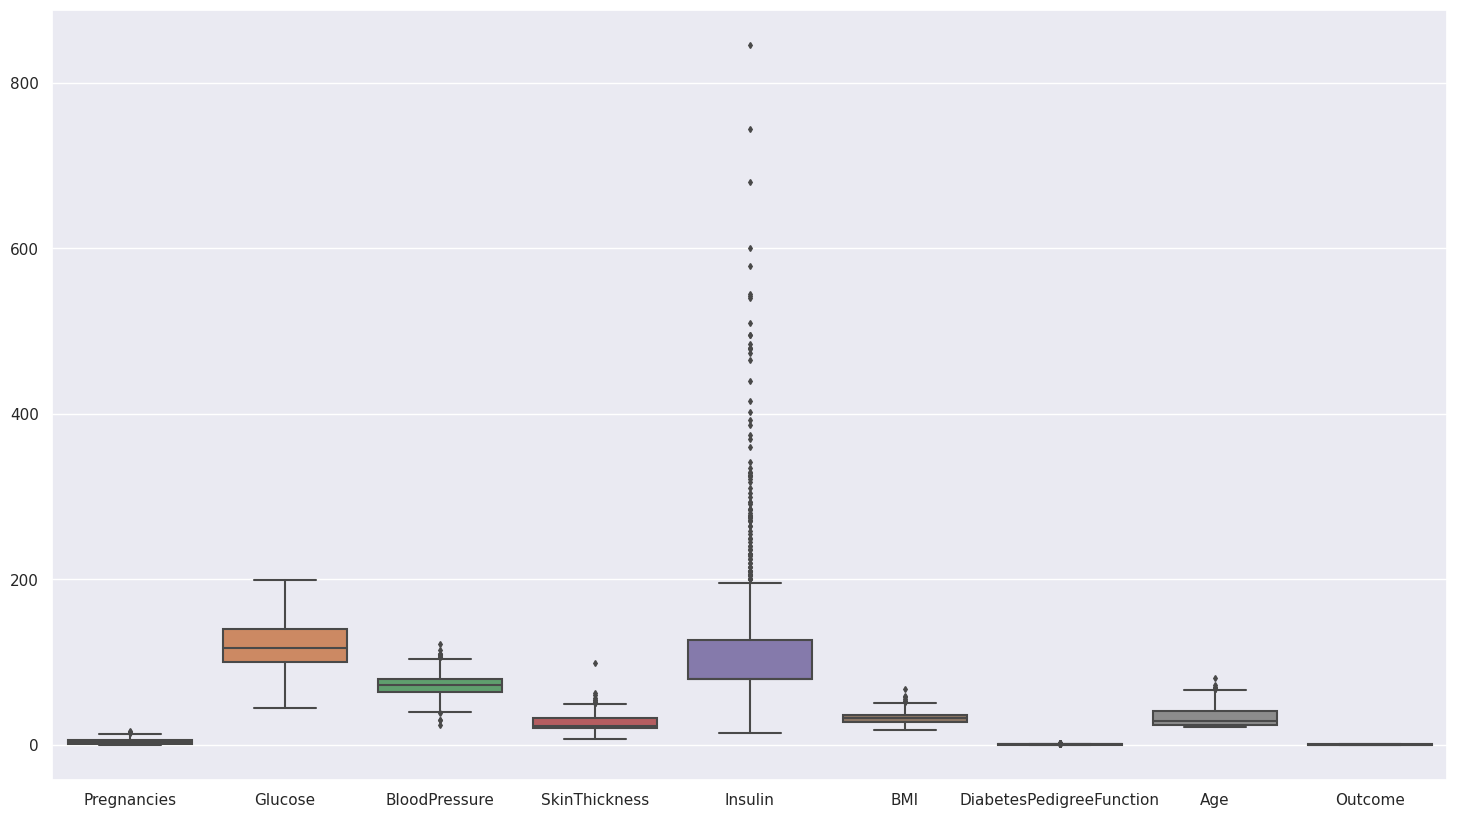

In [26]:
fig,ax=plt.subplots(figsize=(18,10))
sns.boxplot(data=data,ax=ax,fliersize=3)

In [27]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.00,72.00,35.00,79.80,33.60,0.63,50,1
1,1,85.00,66.00,29.00,79.80,26.60,0.35,31,0
2,8,183.00,64.00,20.54,79.80,23.30,0.67,32,1
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21,0
4,0,137.00,40.00,35.00,168.00,43.10,2.29,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.00,76.00,48.00,180.00,32.90,0.17,63,0
764,2,122.00,70.00,27.00,79.80,36.80,0.34,27,0
765,5,121.00,72.00,23.00,112.00,26.20,0.24,30,0
766,1,126.00,60.00,20.54,79.80,30.10,0.35,47,1


In [28]:
x=data.drop(columns=['Outcome'])
y=data['Outcome']

In [29]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.00,72.00,35.00,79.80,33.60,0.63,50
1,1,85.00,66.00,29.00,79.80,26.60,0.35,31
2,8,183.00,64.00,20.54,79.80,23.30,0.67,32
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21
4,0,137.00,40.00,35.00,168.00,43.10,2.29,33
...,...,...,...,...,...,...,...,...
763,10,101.00,76.00,48.00,180.00,32.90,0.17,63
764,2,122.00,70.00,27.00,79.80,36.80,0.34,27
765,5,121.00,72.00,23.00,112.00,26.20,0.24,30
766,1,126.00,60.00,20.54,79.80,30.10,0.35,47


In [30]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## VIF Testing

In [32]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)
x_scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [33]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

In [34]:
vif['Features'] = x.columns

In [35]:
vif

,VIF,Features
0,1.43,Pregnancies
1,1.35,Glucose
2,1.25,BloodPressure
3,1.45,SkinThickness
4,1.26,Insulin
5,1.55,BMI
6,1.06,DiabetesPedigreeFunction
7,1.61,Age


In [37]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y,test_size=.5,random_state =123)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:06<00:00,  4.79it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.74               0.74     0.74      0.75   
RandomForestClassifier             0.76               0.74     0.74      0.76   
QuadraticDiscriminantAnalysis      0.77               0.73     0.73      0.76   
LGBMClassifier                     0.75               0.73     0.73      0.75   
CalibratedClassifierCV             0.77               0.73     0.73      0.76   
LinearDiscriminantAnalysis         0.76               0.72     0.72      0.75   
KNeighborsClassifier               0.76               0.72     0.72      0.75   
SGDClassifier                      0.73               0.72     0.72      0.73   
RidgeClassifierCV                  0.76               0.72     0.72      0.75   
LogisticRegression                 0.76               0.72     0.72      0.75   
GaussianNB                  